In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:

X = np.array(10*np.random.randn(37,5))

In [8]:
df = pd.DataFrame(X,columns=['Feature'+str(l) for l in range(1,6)])

In [9]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5
0,-3.978805,14.837619,2.255000,15.073972,-16.237618
1,10.093735,0.248820,8.716661,14.778676,-8.175519
2,9.799908,-3.808561,-19.623098,20.716072,11.928762
3,2.465759,-7.253584,-6.244976,-12.189333,4.832894
4,-18.827942,15.301045,1.249512,-10.454375,-6.068261


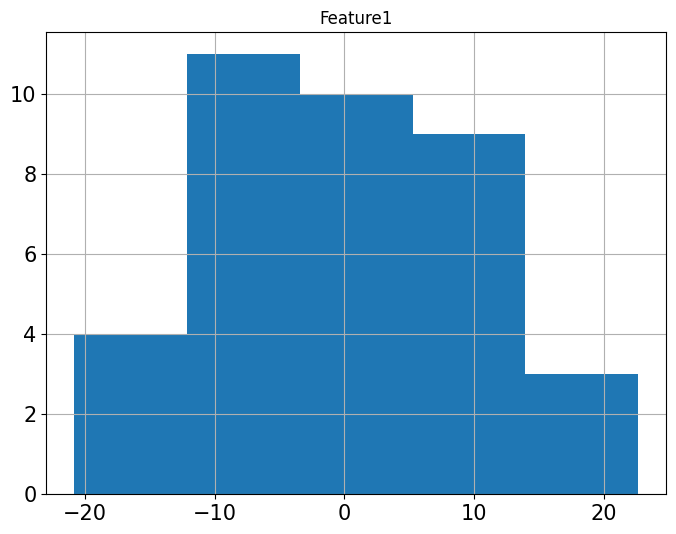

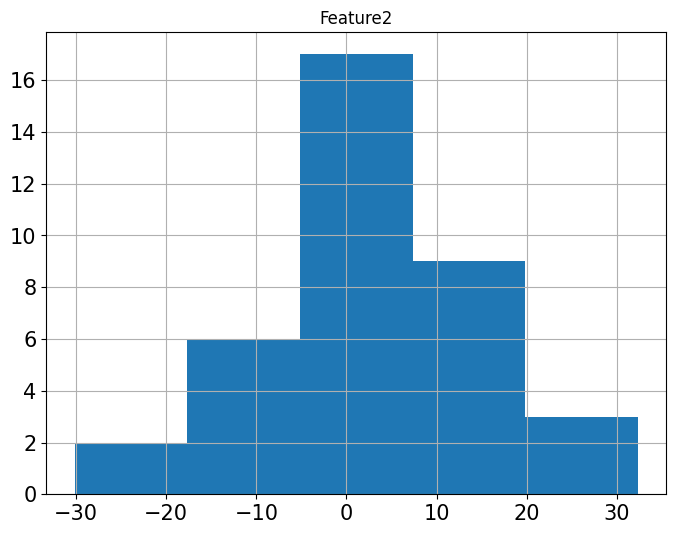

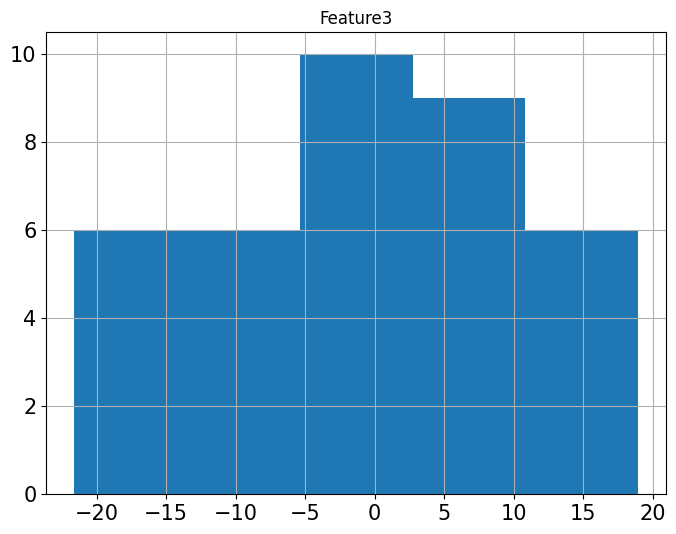

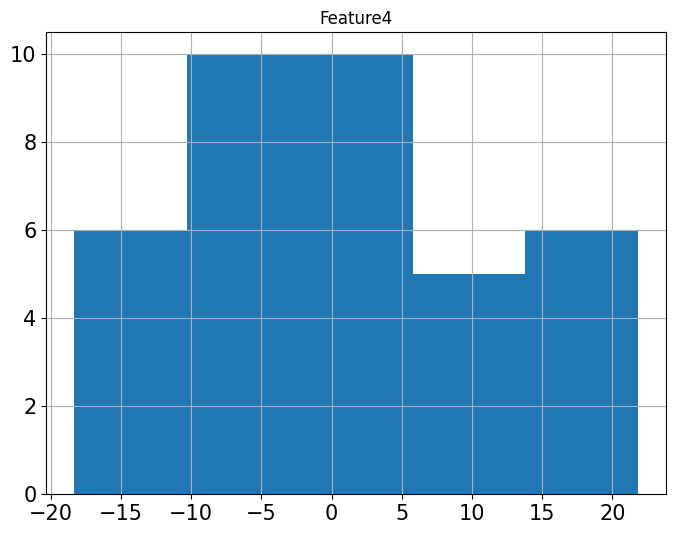

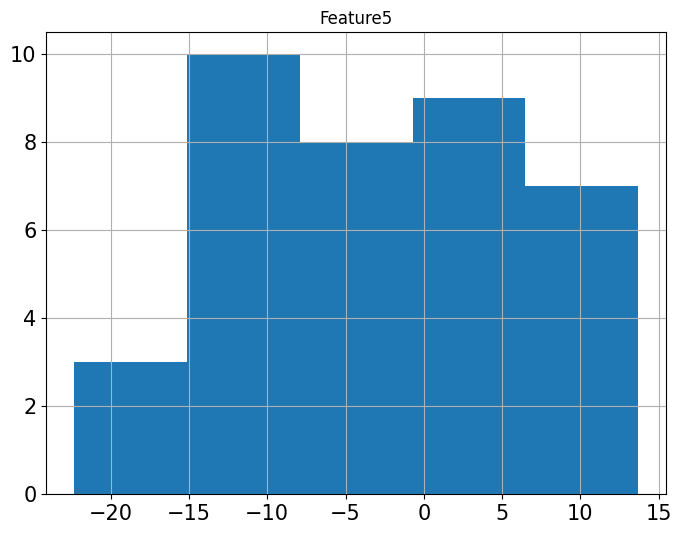

In [10]:
for i in df.columns:
    df.hist(i,bins=5,xlabelsize=15,ylabelsize=15,figsize=(8,6))

In [11]:
df['y']=5*df['Feature1']**2+13*df['Feature2' ]+0.1*df['Feature3']**2*df['Feature1']\
+2*df['Feature4']*df['Feature5']+0.1*df['Feature5']**3+0.8*df['Feature1']*df['Feature4']*df['Feature5'] \
+30*np.random.normal(loc=5,scale=2)

In [12]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-3.978805,14.837619,2.255000,15.073972,-16.237618,282.517239
1,10.093735,0.248820,8.716661,14.778676,-8.175519,-531.543573
2,9.799908,-3.808561,-19.623098,20.716072,11.928762,3560.446036
3,2.465759,-7.253584,-6.244976,-12.189333,4.832894,-125.967334
4,-18.827942,15.301045,1.249512,-10.454375,-6.068261,1268.461470


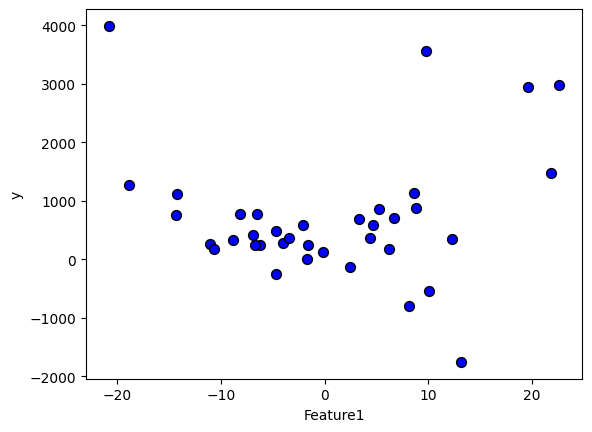

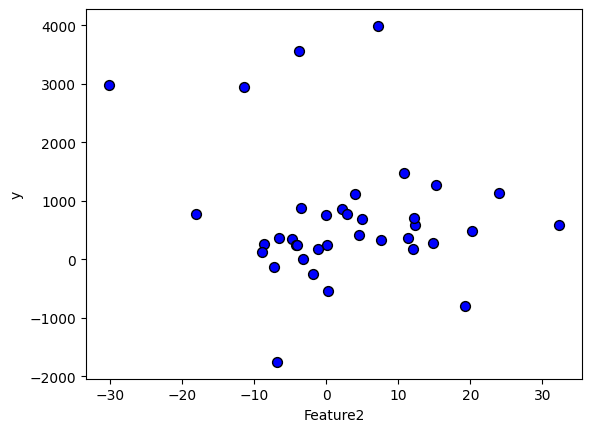

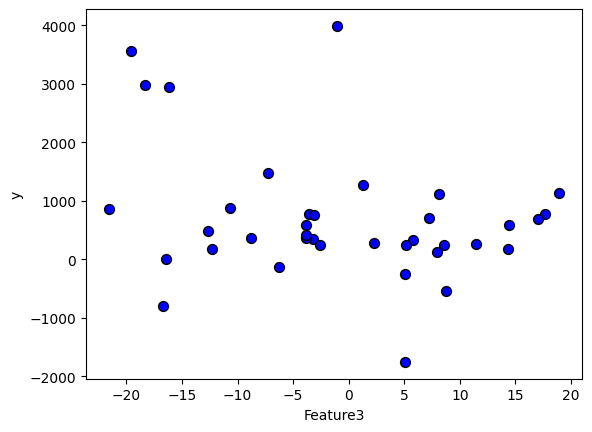

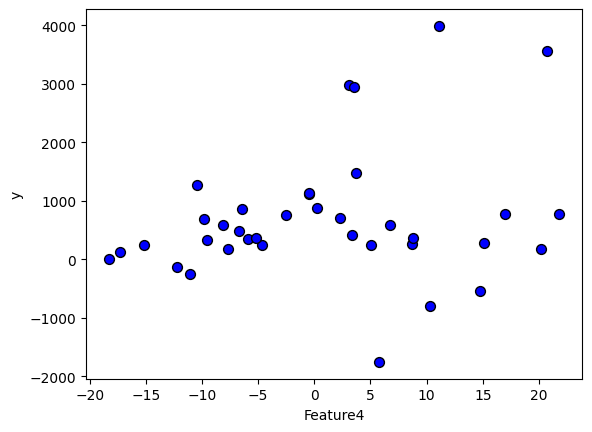

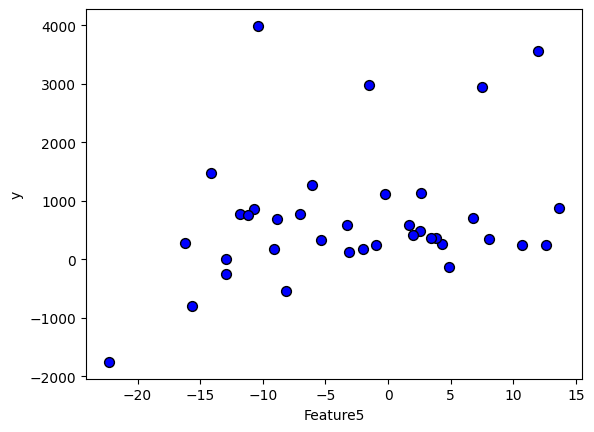

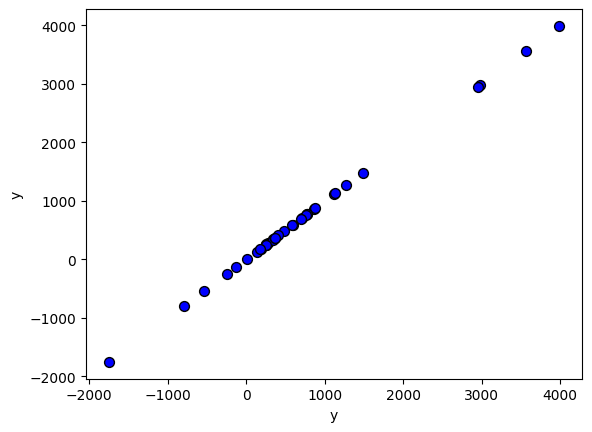

In [15]:
for i in df.columns:
    df.plot.scatter(i,'y',edgecolors=(0,0,0),s=50,c='b',grid=False)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linear_model = LinearRegression()

In [24]:
X_linear = df.drop('y',axis=1)
y_linear = df['y']

In [26]:
linear_model.fit(X_linear,y_linear)

LinearRegression()

In [27]:
y_pred_linear = linear_model.predict(X_linear)

In [28]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))

In [29]:
print("Root mean square error of linear model:",RMSE_linear)

Root mean square error of linear model: 5844.098678857159


In [36]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns,columns=['Linear Model Coefficient'])
coeff_linear

,Linear Model Coefficient
Feature1,-13.309334
Feature2,-3.782180
Feature3,-33.596596
Feature4,28.720683
Feature5,34.811795


In [37]:
print("R2 value of linear model:",linear_model.score(X_linear,y_linear))

R2 value of linear model: 0.24040709181283415


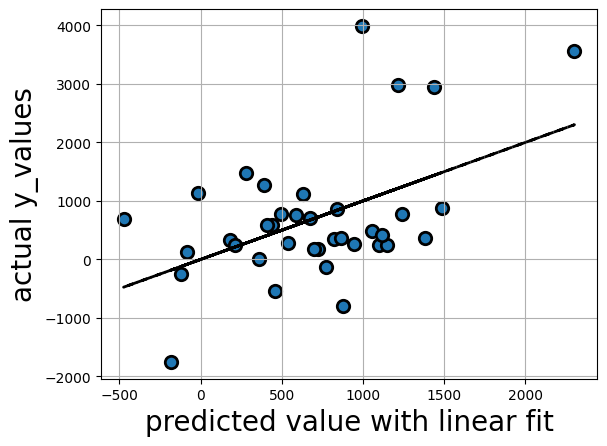

In [38]:
plt.Figure(figsize=(12,8))
plt.xlabel("predicted value with linear fit",fontsize=20)
plt.ylabel("actual y_values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear,'k--',lw=2)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(3,include_bias=False)

In [48]:
poly = PolynomialFeatures(degree=3)

In [49]:
X_poly = poly.fit_transform(X)

In [51]:
df_poly = pd.DataFrame(X_poly)
df_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,-3.978805,14.837619,2.255000,15.073972,-16.237618,15.830888,-59.035992,-8.972204,-59.976395,...,11.466728,76.651514,-82.568681,512.391534,-551.945959,594.553816,3425.178077,-3689.587110,3974.407385,-4281.214561
1,1.0,10.093735,0.248820,8.716661,14.778676,-8.175519,101.883482,2.511527,87.983663,149.172039,...,662.293419,1122.886422,-621.177377,1903.799557,-1053.176164,582.613872,3227.799964,-1785.609189,987.793609,-546.444441
2,1.0,9.799908,-3.808561,-19.623098,20.716072,11.928762,96.038205,-37.323553,-192.304565,203.015612,...,-7556.187512,7977.054686,4593.360566,-8421.363468,-4849.203169,-2792.276033,8890.419515,5119.295783,2947.801200,1697.407667
3,1.0,2.465759,-7.253584,-6.244976,-12.189333,4.832894,6.079966,-17.885588,-15.398604,-30.055955,...,-243.552330,-475.380619,188.481523,-927.877524,367.889985,-145.863045,-1811.089187,718.070604,-284.704583,112.881239
4,1.0,-18.827942,15.301045,1.249512,-10.454375,-6.068261,354.491407,-288.087185,-23.525744,196.834374,...,1.950839,-16.322215,-9.474260,136.564142,79.268904,46.011779,-1142.600105,-663.224305,-384.969752,-223.456391
